In [46]:
# 파일 경로
file_path_2000 = "data/NHSDA-2000-DS0001-data-ascii.txt" 
file_path_2001 = "data/NHSDA-2001-DS0001-data-ascii.txt" 

## 2000

In [54]:
import pandas as pd

# Function to extract variables based on start positions and widths
def extract_variables(file_path):
    column_specs = [(3904, 3906),  # AGE2 (3905-3906, inclusive)
                    (3914, 3916),  # IRSEX (3917)
                    (3918, 3920),  # IRMARIT (IRSEX +)
                    (3908, 3910),  # SERVICE (3909-3910, inclusive)
                    (31, 33),      # CG30EST (32-33, inclusive)
                    (167, 169)]      # AL30EST (29-30, inclusive) + 39
    
    column_names = ['AGE2', 'IRSEX', 'IRMARIT', 'SERVICE', 'CG30EST', 'AL30EST']
    
    # Read fixed-width file
    data = pd.read_fwf(file_path, colspecs=column_specs, header=None, names=column_names)
    
    return data

df = extract_variables(file_path_2000)
df

,AGE2,IRSEX,IRMARIT,SERVICE,CG30EST,AL30EST
0,13,2,1,2,91,91
1,15,2,1,1,91,93
2,1,2,99,99,91,91
3,16,1,1,1,93,99
4,3,1,99,99,91,91
...,...,...,...,...,...,...
58675,14,2,1,2,93,91
58676,14,2,1,2,93,93
58677,14,2,3,2,99,91
58678,3,1,99,99,91,91


In [55]:
df['IRMARIT'].value_counts()

IRMARIT
4     27150
1     17188
99     9970
3      3188
2      1184
Name: count, dtype: int64

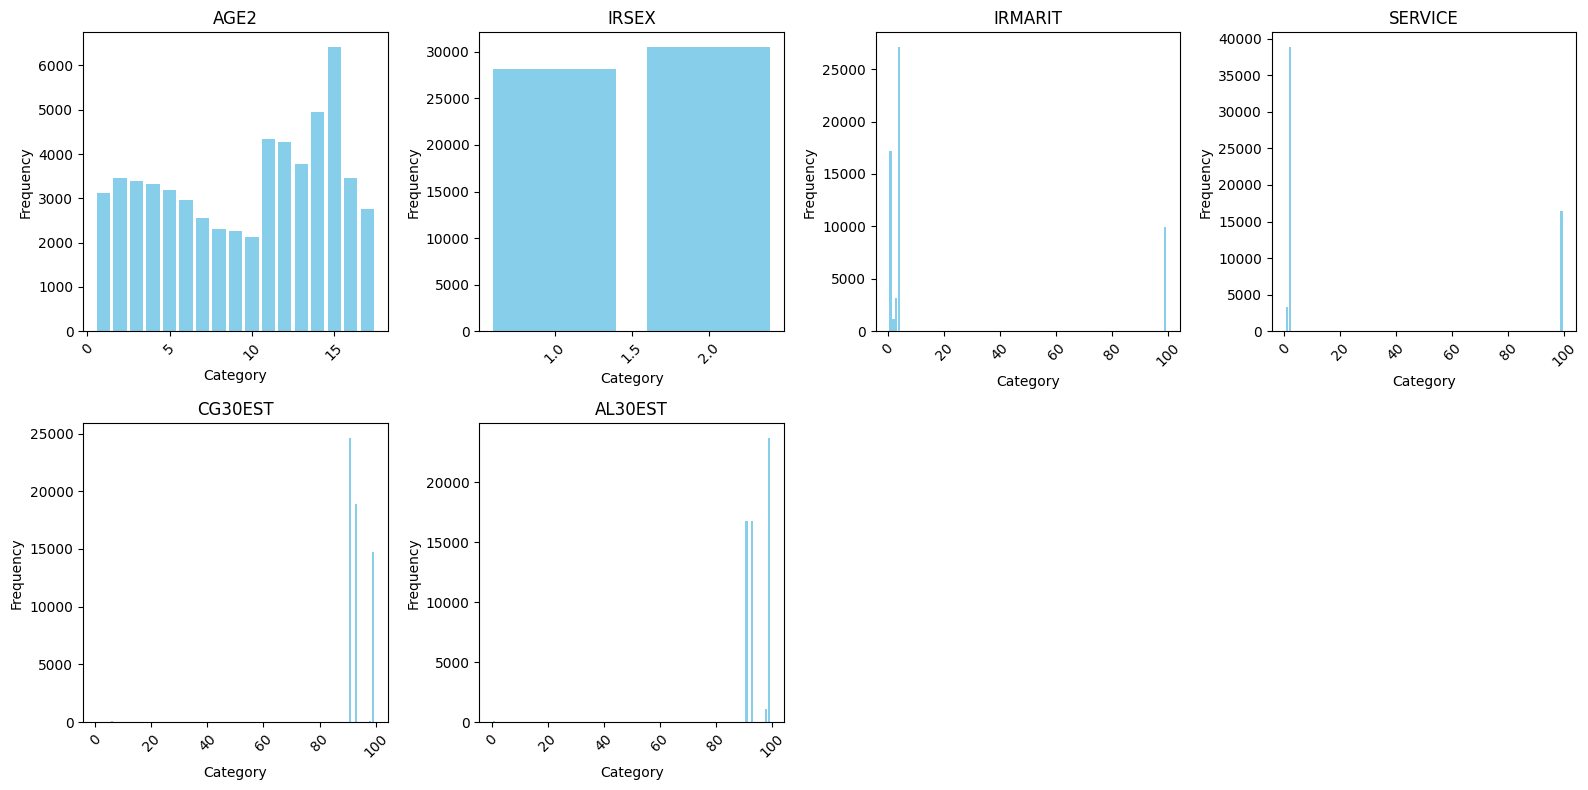

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame containing the variables
# Replace with your dataset path or loaded DataFrame
# data = pd.read_csv("data/jiwon_2001.csv")
data = df

# List of variables to visualize
variables_to_visualize = ["AGE2", "IRSEX", "IRMARIT", "SERVICE", "CG30EST", "AL30EST"]

# Set the size of the grid for subplots (adjust rows/cols as needed)
rows = 2  # Number of rows
cols = 4  # Number of columns (adjust based on number of variables)

# Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate through the variables and plot them
for i, variable in enumerate(variables_to_visualize):
    if variable in data.columns:
        # Get value counts
        counts = data[variable].value_counts().sort_index()
        
        # Plot the bar chart
        axes[i].bar(counts.index, counts.values, color="skyblue")
        axes[i].set_title(f"{variable}")
        axes[i].set_xlabel("Category")
        axes[i].set_ylabel("Frequency")
        axes[i].tick_params(axis='x', rotation=45)
    else:
        # If the variable is missing, leave the subplot blank
        axes[i].axis('off')
        axes[i].set_title(f"{variable} (Missing)")

# Hide any unused subplots
for j in range(len(variables_to_visualize), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [135]:
# Save to CSV
df.to_csv("preprocessed_data/jiwon_2000.csv")
print("Data parsed and saved to 'jiwon_2000.csv'")

Data parsed and saved to 'jiwon_2000.csv'


## 2001

In [41]:
import pandas as pd

colspecs = [(4464, 4466),  # AGE2 (3905-3906, inclusive)
                    (4474, 4476),  # IRSEX (3917)
                    (4478, 4480),  # IRMARIT (IRSEX +)
                    (4468, 4470),  # SERVICE (3909-3910, inclusive)
                    (31, 33),      # CG30EST (32-33, inclusive)
                    (167, 169)] 

# Column names
columns = ['AGE2', 'IRSEX', 'IRMARIT', 'SERVICE', 'CG30EST', 'AL30EST']

# ASCII file path
ascii_file = file_path_2001

# Read ASCII file
def parse_ascii(file_path, colspecs, columns):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            row = [line[start:end].strip() for start, end in colspecs]
            data.append(row)
    return pd.DataFrame(data, columns=columns)

# Parse the file
df = parse_ascii(ascii_file, colspecs, columns)

In [42]:
df

,AGE2,IRSEX,IRMARIT,SERVICE,CG30EST,AL30EST
0,11,2,4,2,91,93
1,4,2,4,99,91,91
2,15,1,1,2,99,93
3,15,2,1,2,99,93
4,15,2,1,2,91,91
...,...,...,...,...,...,...
55556,3,1,99,99,93,93
55557,1,1,99,99,91,91
55558,5,1,4,99,99,99
55559,9,2,4,2,99,99


In [43]:
df['IRMARIT'].value_counts()

IRMARIT
4     25862
1     16586
99     8875
3      3147
2      1091
Name: count, dtype: int64

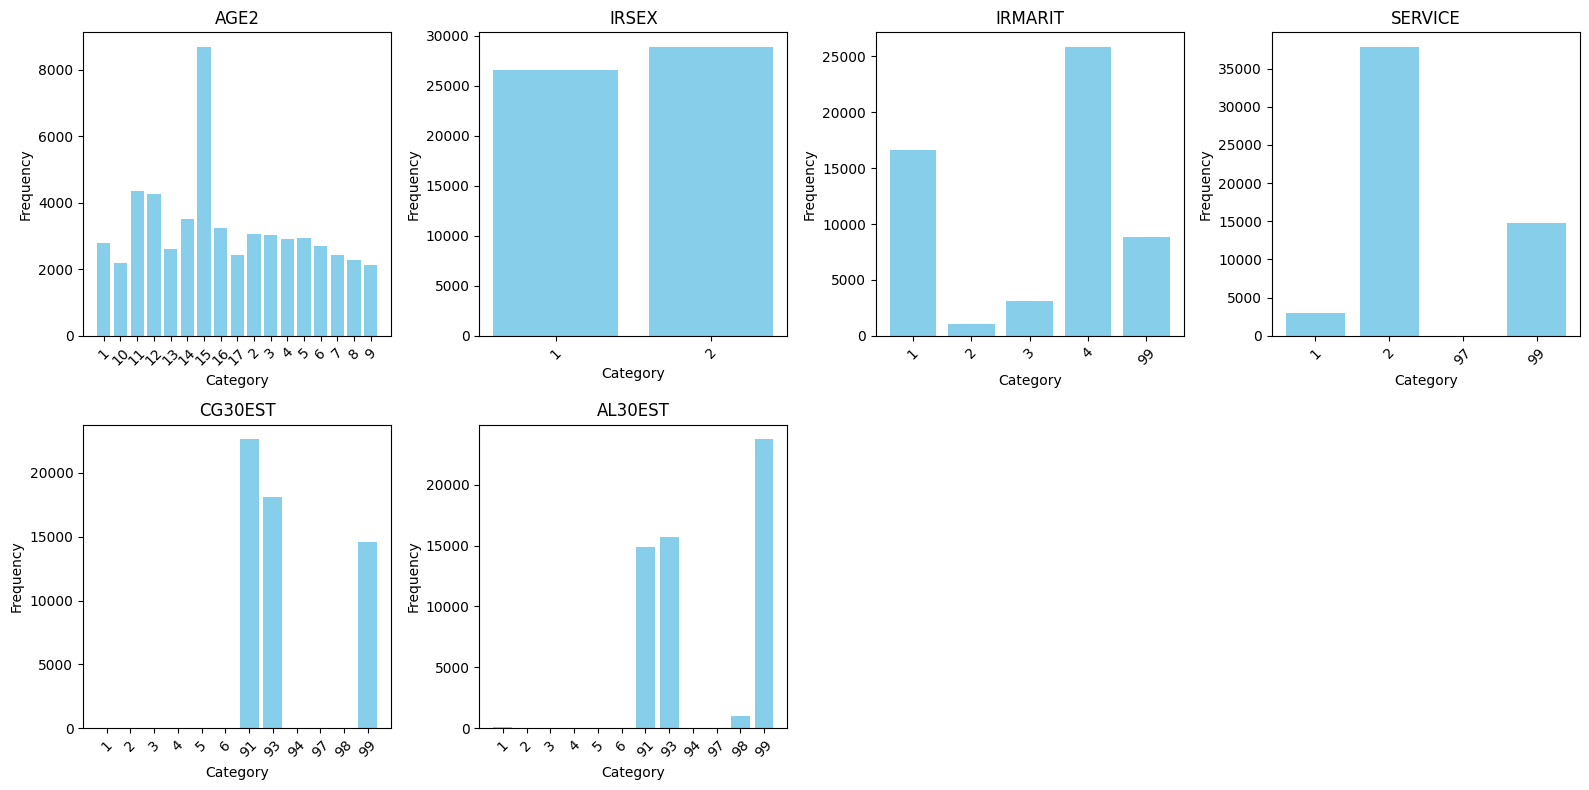

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame containing the variables
# Replace with your dataset path or loaded DataFrame
# data = pd.read_csv("data/jiwon_2001.csv")
data = df

# List of variables to visualize
variables_to_visualize = ["AGE2", "IRSEX", "IRMARIT", "SERVICE", "CG30EST", "AL30EST"]

# Set the size of the grid for subplots (adjust rows/cols as needed)
rows = 2  # Number of rows
cols = 4  # Number of columns (adjust based on number of variables)

# Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate through the variables and plot them
for i, variable in enumerate(variables_to_visualize):
    if variable in data.columns:
        # Get value counts
        counts = data[variable].value_counts().sort_index()
        
        # Plot the bar chart
        axes[i].bar(counts.index, counts.values, color="skyblue")
        axes[i].set_title(f"{variable}")
        axes[i].set_xlabel("Category")
        axes[i].set_ylabel("Frequency")
        axes[i].tick_params(axis='x', rotation=45)
    else:
        # If the variable is missing, leave the subplot blank
        axes[i].axis('off')
        axes[i].set_title(f"{variable} (Missing)")

# Hide any unused subplots
for j in range(len(variables_to_visualize), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [45]:
# Save to CSV
df.to_csv("preprocessed_data/jiwon_2001.csv")
print("Data parsed and saved to 'jiwon_2001.csv'")

Data parsed and saved to 'jiwon_2001.csv'


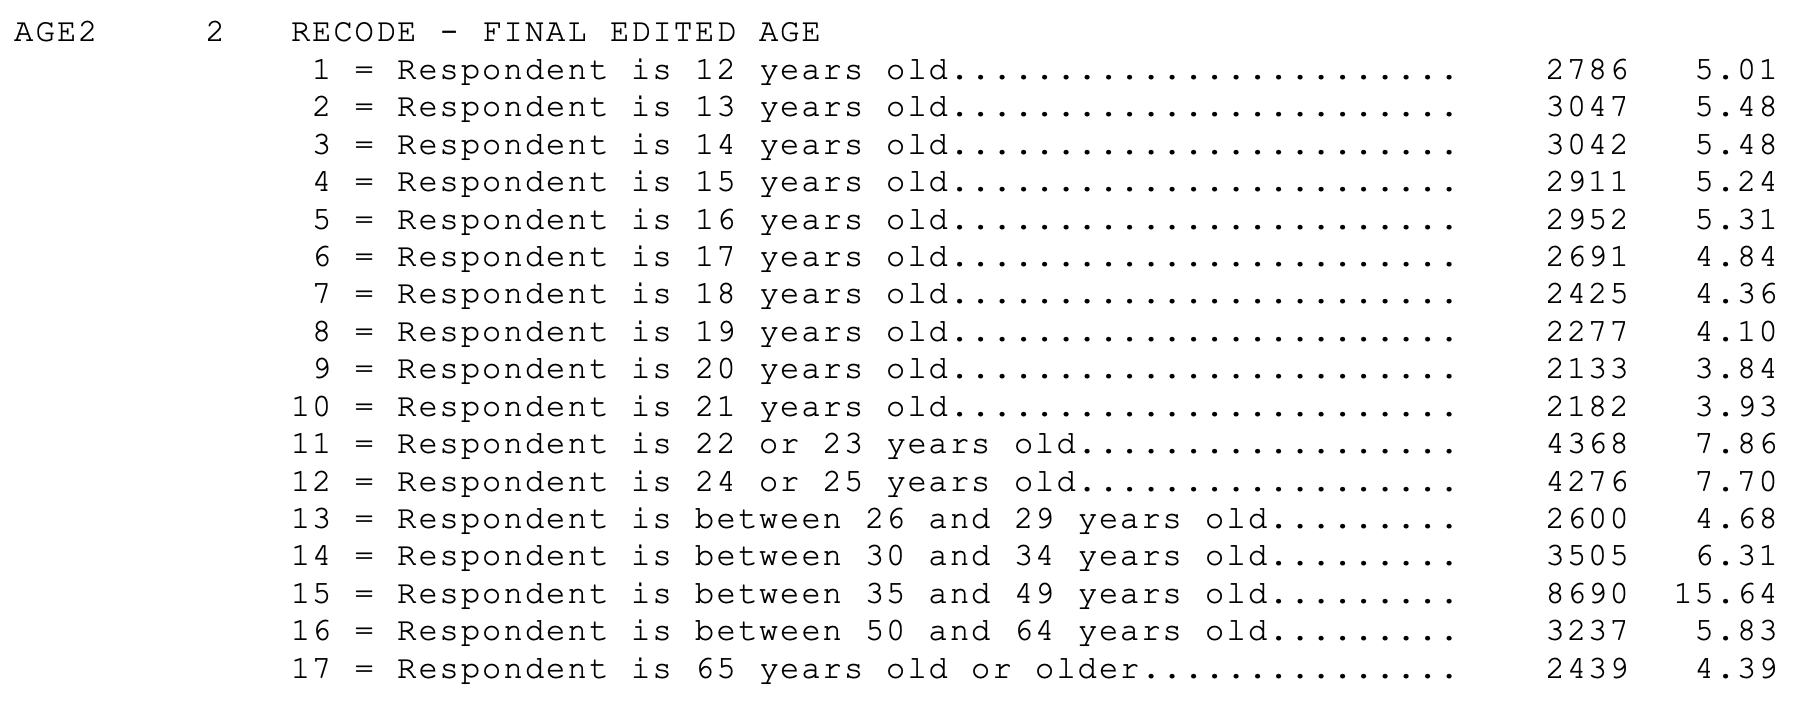

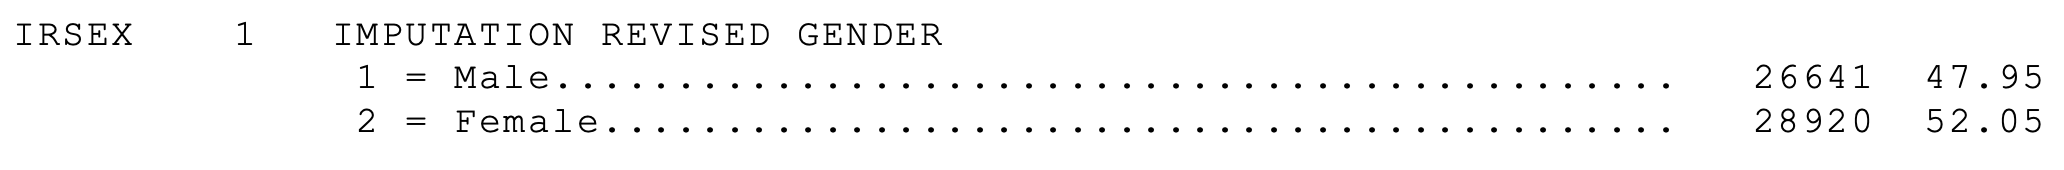

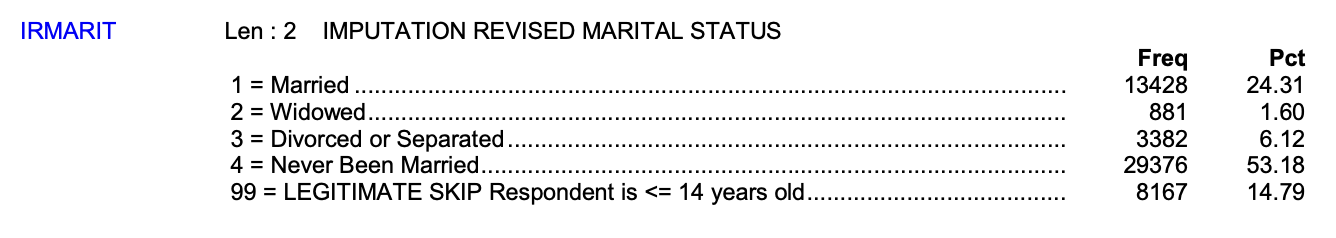

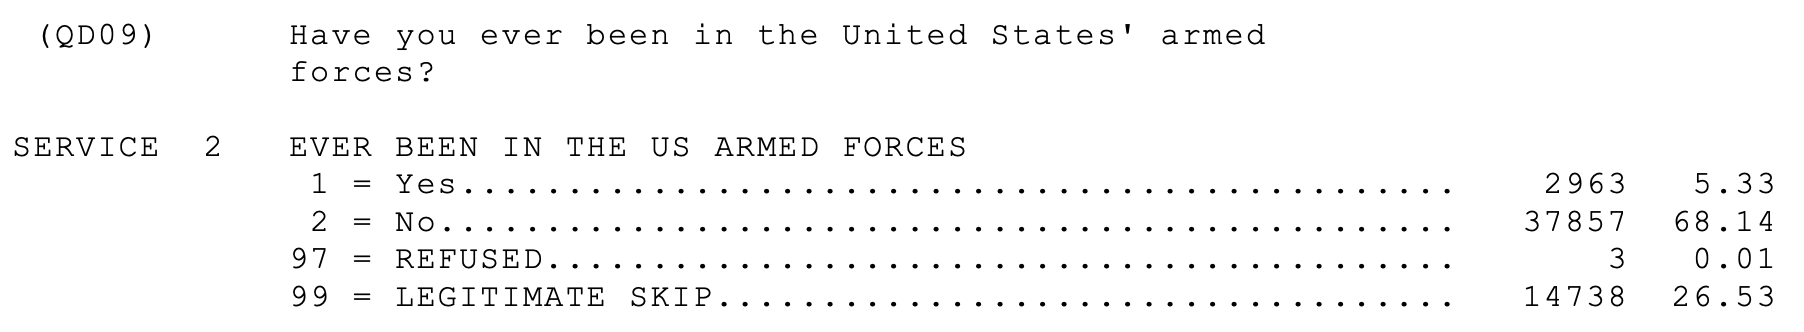

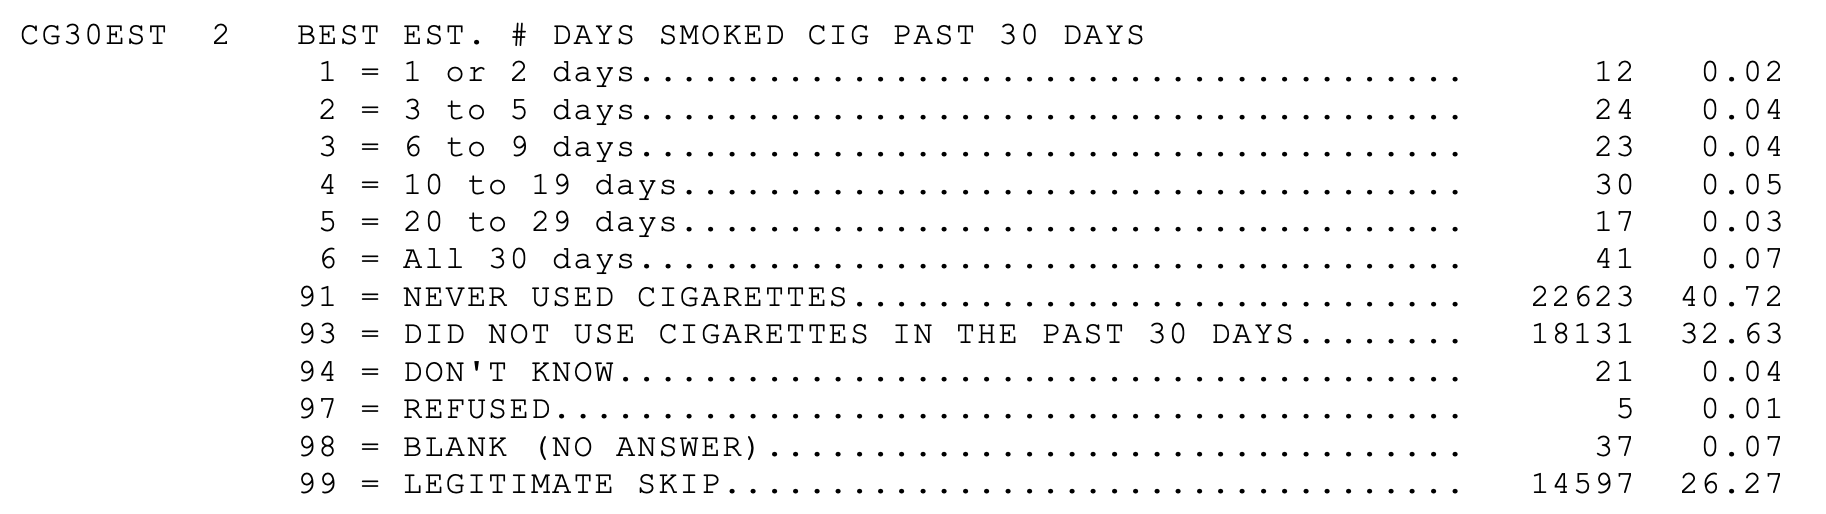

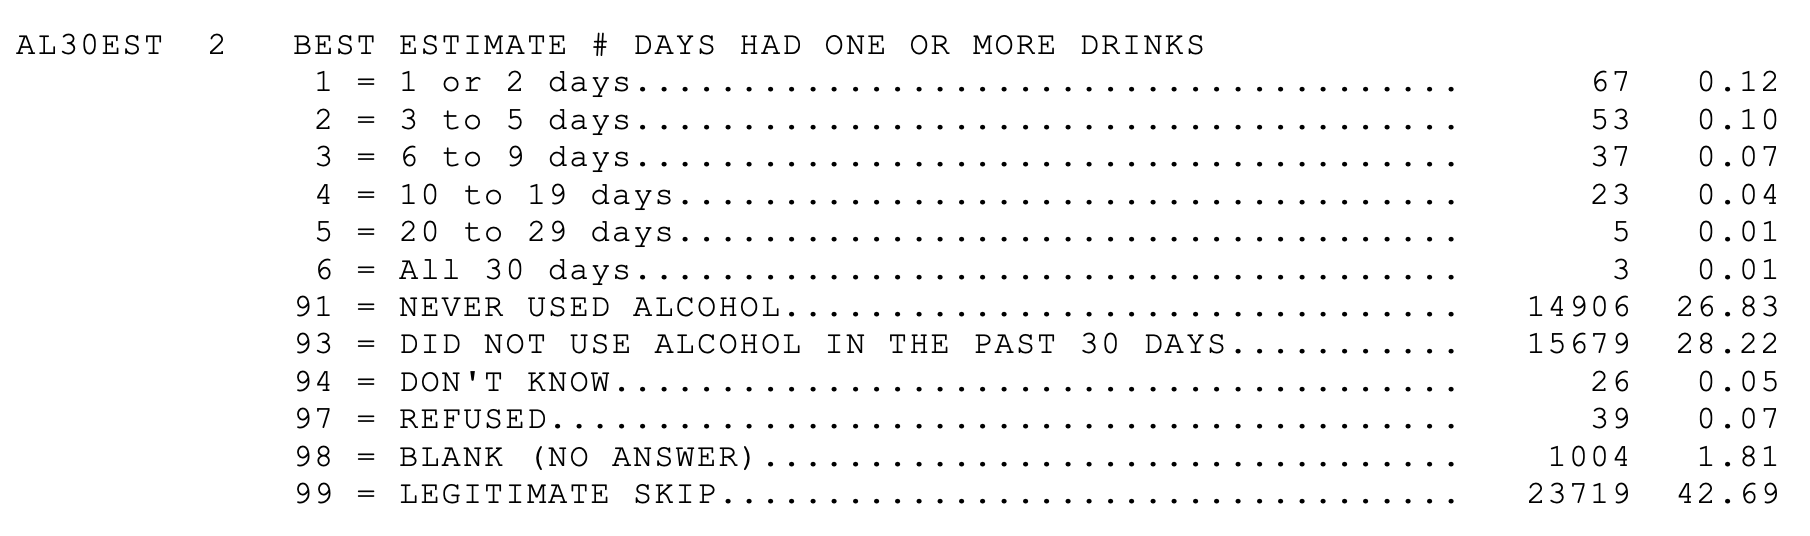

## 2002~2020년 일괄처리

In [9]:
import pandas as pd
import os

# File paths for each year
file_paths = {
    "2002": "data/NSDUH_2002_Tab.tsv",  # Replace with actual file paths
    "2003": "data/NSDUH_2003_Tab.tsv",
    "2004": "data/NSDUH_2004_Tab.tsv",
    "2005": "data/NSDUH_2005_Tab.tsv",
    "2006": "data/NSDUH_2006_Tab.tsv",
    "2007": "data/NSDUH_2007_Tab.tsv",
    "2008": "data/NSDUH_2008_Tab.tsv",
    "2009": "data/NSDUH_2009_Tab.tsv",
    "2010": "data/NSDUH_2010_Tab.tsv",
    "2011": "data/NSDUH_2011_Tab.tsv",
    "2012": "data/NSDUH_2012_Tab.tsv",
    "2013": "data/NSDUH_2013_Tab.tsv",
    "2014": "data/NSDUH_2014_Tab.tsv",
    "2015": "data/NSDUH_2015_Tab.tsv",
    "2016": "data/NSDUH_2016_Tab.tsv",
    "2017": "data/NSDUH_2017_Tab.tsv",
    "2018": "data/NSDUH_2018_Tab.tsv",
    "2019": "data/NSDUH_2019_Tab.tsv",
    "2020": "data/NSDUH_2020_Tab.tsv"
}

# Columns to extract
columns = ['AGE2', 'IRSEX', 'IRMARIT', 'SERVICE', 'CG30EST', 'AL30EST']

# Output folder
output_folder = "preprocessed_data"
os.makedirs(output_folder, exist_ok=True)

# Process each file
for year, file_path in file_paths.items():
    try:
        # Read the TSV file
        df = pd.read_csv(file_path, sep="\t")
        
        # Extract specified columns
        filtered_df = df[columns]
        
        # Save to new CSV file
        output_file = os.path.join(output_folder, f"jiwon_{year}.csv")
        filtered_df.to_csv(output_file)
        
        print(f"Processed {year}: Saved to {output_file}")
    except Exception as e:
        print(f"Error processing {year}: {e}")


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2181) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2002: Saved to preprocessed_data/jiwon_2002.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2303) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2003: Saved to preprocessed_data/jiwon_2003.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2542) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2004: Saved to preprocessed_data/jiwon_2004.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2725) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2005: Saved to preprocessed_data/jiwon_2005.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2967) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2006: Saved to preprocessed_data/jiwon_2006.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2962) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2007: Saved to preprocessed_data/jiwon_2007.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2963) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2008: Saved to preprocessed_data/jiwon_2008.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2938) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2009: Saved to preprocessed_data/jiwon_2009.csv
Processed 2010: Saved to preprocessed_data/jiwon_2010.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2947) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2011: Saved to preprocessed_data/jiwon_2011.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2975) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2012: Saved to preprocessed_data/jiwon_2012.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2954) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2013: Saved to preprocessed_data/jiwon_2013.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2946) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2014: Saved to preprocessed_data/jiwon_2014.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2514) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Error processing 2015: "['IRMARIT'] not in index"


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2506) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2016: Saved to preprocessed_data/jiwon_2016.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2502) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2017: Saved to preprocessed_data/jiwon_2017.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2525) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2018: Saved to preprocessed_data/jiwon_2018.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2575) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2019: Saved to preprocessed_data/jiwon_2019.csv


/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/3720498724.py:38: DtypeWarning: Columns (2726) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


Processed 2020: Saved to preprocessed_data/jiwon_2020.csv


## 2015년 특수처리

In [10]:
import pandas as pd
import os

# File paths for each year
file_path = "data/NSDUH_2015_Tab.tsv"

# Columns to extract
columns = ['AGE2', 'IRSEX', 'IRMARITSTAT', 'SERVICE', 'CG30EST', 'AL30EST']

# Output folder
output_folder = "preprocessed_data"


# Read the TSV file
df = pd.read_csv(file_path, sep="\t")
        
# Extract specified columns
filtered_df = df[columns]
filtered_df

/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/4239004974.py:15: DtypeWarning: Columns (2514) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep="\t")


,AGE2,IRSEX,IRMARITSTAT,SERVICE,CG30EST,AL30EST
0,6,1,4,2,93,99
1,15,1,3,2,93,99
2,14,2,4,2,91,93
3,2,2,99,99,91,93
4,11,2,1,2,99,93
...,...,...,...,...,...,...
57141,16,1,4,2,91,99
57142,12,1,4,2,93,99
57143,11,2,4,2,91,99
57144,4,1,4,99,99,99


In [12]:
filtered_df['IRMARITSTAT'].value_counts()

IRMARITSTAT
4     25897
1     18062
99     6639
3      4856
2      1692
Name: count, dtype: int64

In [13]:
# Rename the column
filtered_df.rename(columns={'IRMARITSTAT': 'IRMARIT'}, inplace=True)
filtered_df

/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_70768/572067392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'IRMARITSTAT': 'IRMARIT'}, inplace=True)


,AGE2,IRSEX,IRMARIT,SERVICE,CG30EST,AL30EST
0,6,1,4,2,93,99
1,15,1,3,2,93,99
2,14,2,4,2,91,93
3,2,2,99,99,91,93
4,11,2,1,2,99,93
...,...,...,...,...,...,...
57141,16,1,4,2,91,99
57142,12,1,4,2,93,99
57143,11,2,4,2,91,99
57144,4,1,4,99,99,99


In [14]:
# Save to new CSV file
filtered_df.to_csv("preprocessed_data/jiwon_2015.csv")

## Concat

In [16]:
import os
import pandas as pd

# Path to the folder containing the files
folder_path = "preprocessed_data"

# List to store individual DataFrames
dataframes = []

# Iterate over all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv") and file_name.startswith("jiwon_"):
        # Extract the year from the file name
        year = int(file_name.split("_")[1].split(".")[0])
        
        # Load the file into a DataFrame
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path, index_col=0)
        
        # Add the 'year' column
        df['year'] = year
        
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all DataFrames
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

,AGE2,IRSEX,IRMARIT,SERVICE,CG30EST,AL30EST,year
0,15,1,3,2,99,93,2020
1,15,1,4,2,99,99,2020
2,14,2,4,2,91,93,2020
3,15,1,1,2,91,99,2020
4,3,1,99,99,91,93,2020
...,...,...,...,...,...,...,...
1152550,14,2,4,2,99,99,2011
1152551,16,2,1,2,93,93,2011
1152552,17,1,3,1,93,93,2011
1152553,13,1,1,2,91,91,2011


In [18]:
combined_df['year'].nunique()

21

In [20]:
# Save the combined DataFrame to a new CSV file
output_file = "preprocessed_data/jiwon_combined_data.csv"
combined_df.to_csv(output_file)